## Libraries

In [1]:
from bidi.algorithm import get_display
from arabic_reshaper import reshape
import arabic_reshaper
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from bidi.algorithm import get_display
import math
from wordcloud import (WordCloud, get_single_color_func)

# Functions

In [2]:
#Extract and clean Hashtags from posts



def extract_hashtags(text , i):
     

    for word in text.split():
        localvalidity = 0 


        if word[0] == '#':
            for i in range(len(word)-1):
                
                if word[i+1] == '#'  :
                    unique_string = arabic_reshaper.reshape((word[1:i+1]))
                    unique_string = get_display(unique_string)
                    hashtag_list.append(unique_string)
                    lable_list.append(label[i])
                    localvalidity=1
                    break
               
                    
            
            if localvalidity==0:
                unique_string = arabic_reshaper.reshape((word[1:]))
                unique_string = get_display(unique_string)
                hashtag_list.append( unique_string)
                lable_list.append(label[i])
                
               
       


In [3]:
#Generate a dictionary which reveals number of hashtag repeats
#                example_dict ={  Tehran    :  12   }
#                       dict  ={hashtag name : count}

def getDuplicatesWithCount(listOfElems):
    
    dictOfElems = dict()
   
    for elem in listOfElems:
       
        if elem in dictOfElems  :
            dictOfElems[elem] += 1
        else:
            dictOfElems[elem] = 1    
 
   
    dictOfElems = { key:value for key, value in dictOfElems.items() if value > 1}
   
    return dictOfElems

In [4]:
#Generate a dictionary which reveals number of hashtag repeats according to its impression 1 = positive , 0 = negative
#                example_dict ={  Tehran    :         [10 , 1]    }
#                       dict  ={hashtag name : [count , (pos/neg)]}



def getDuplicatesWithCount_iter(listOfElems , scores):
    
    dictOfElems = dict()
    # Iterate over each element in list
    for i in range(len(listOfElems)):
        # If element exists in dict then increment its value else add it in dict
        
        if listOfElems[i] in dictOfElems :
            if dictOfElems[listOfElems[i]][1] ==scores[i]:
                dictOfElems[listOfElems[i]][0] += 1
            else:
                if (listOfElems[i] + "." ) in dictOfElems:
                    dictOfElems[listOfElems[i]+ "." ][0] += 1
                else:
                    dictOfElems[listOfElems[i]+ "."] = [1 , scores[i]] 

        else:
            dictOfElems[listOfElems[i]] = [1 , scores[i]]    
        
 
    return dictOfElems

In [5]:
# see if its in the correct sector(district)

def find_sector(tagid , sector):
    value =False
    for i in range(len(sector)):
        if tagid == sector[i]:
               value = True
    return value

In [6]:
class SimpleGroupedColorFunc(object):


    def __init__(self, color_to_words, default_color):
        self.word_to_color = {word: color
                              for (color, words) in color_to_words.items()
                              for word in words}

        self.default_color = default_color

    def __call__(self, word, **kwargs):
        return self.word_to_color.get(word, self.default_color)
    
class GroupedColorFunc(object):
    """Create a color function object which assigns DIFFERENT SHADES of
       specified colors to certain words based on the color to words mapping.

       Uses wordcloud.get_single_color_func

       Parameters
       ----------
       color_to_words : dict(str -> list(str))
         A dictionary that maps a color to the list of words.

       default_color : str
         Color that will be assigned to a word that's not a member
         of any value from color_to_words.
    """

    def __init__(self, color_to_words, default_color):
        self.color_func_to_words = [
            (get_single_color_func(color), set(words))
            for (color, words) in color_to_words.items()]

        self.default_color_func = get_single_color_func(default_color)

    def get_color_func(self, word):
        """Returns a single_color_func associated with the word"""
        try:
            color_func = next(
                color_func for (color_func, words) in self.color_func_to_words
                if word in words)
        except StopIteration:
            color_func = self.default_color_func

        return color_func

    def __call__(self, word, **kwargs):
        return self.get_color_func(word)(word, **kwargs)

# ----------------------------------------------

In [7]:
##import and read excel dataset 
df = pd.read_excel (r'posts-1.xlsx')

texts = df["text"].astype(str).values.tolist()
tagid = df["post_tag"].values.tolist()
label  = df["label"].values.tolist()



allqueries = pd.read_excel (r'Final-Result.xlsx')
query_id = allqueries["QUERY-ID"].values.tolist()

### Create sector sorted queries


In [ ]:
#create nested list for each sectors
district = 1 #<--------- you can change the district from here 

query_id_sector = []
temp = []
for i in range(len(query_id)):
    #check if its in the current sector or in the next sector
    if (math.isnan(query_id[i]))==False:
        temp.append(int(query_id[i]))
    if (math.isnan(query_id[i]))==True:
        query_id_sector.append(temp)
        temp = []
print(query_id_sector[district])   

In [22]:
hashtag_list = []  #all hashtags are stored here           example:
#                                                                  hashtags in post 1 = ["تهران" , "کبوتر" , "شهربازی"] label =1
lable_list = []    #all lables for each hastag stored here         hashtags in post 2 = ["شهربازی" , "تهران"] label =0
for i in range(30000):                                         #   hashtags in post 3 = ["شهربازی",  "تهران"] label =0
    if(find_sector(tagid[i] ,query_id_sector[district]) ):     #  hashtag_list = ["شهربازی","شهربازی","تهران", "تهران","تهران","کبوتر","شهربازی"]
        extract_hashtags(texts[i] , i)                         #     label_list= [1,1,1,0,0,0,0] 


AssertionError:  not allowed here

### Generate dictionary from hastag_list

In [23]:
dictOfElems_iter = getDuplicatesWithCount_iter(hashtag_list ,lable_list)


In [24]:
#Adapt the data structure to the Word Cloud library
word_feed = dict()

for key in dictOfElems_iter:
    word_feed[key] = dictOfElems_iter[key][0]

In [25]:
dictOfElems = getDuplicatesWithCount(hashtag_list)

In [26]:
#check the dictionary

lable_list_ = lable_list[:]
hashtag_list_ = hashtag_list[:]
string = hashtag_list[145]
print(string)
result = []
while True:
    try:
        ind = hashtag_list_.index(string)
        #print(ind)
        result.append(lable_list_[ind])
        hashtag_list_.remove(hashtag_list_[ind])
        lable_list_.remove(lable_list_[ind])
    except:
        break
print(result)  #find the word in all posts and show the post's impression for each word"(hashtag)"

love
[0, 0, 0, 0]


In [27]:
#generate a dictionary based on colours and repeats   #example 
color_to_words = {'red' : [] , "blue" : []}          #    color_to_words = {'red' : ["شهربازی", "تهران","شهربازی", "تهران"] , "blue" : ["شهربازی", "سنگ" , "تهران"]}  
default_color = "blue"
for key in dictOfElems_iter:
    try:
    
        if dictOfElems_iter[key][1]==1:
             
            color_to_words["red" ].append(key)  
      
        else:
      
            color_to_words['blue'].append(key)
    except:
        pass

In [28]:
grouped_color_func = GroupedColorFunc(color_to_words ,default_color)

In [29]:
# word cloud generator 
word_cloud = WordCloud(margin = 0,colormap='Set2',scale=1, max_font_size=150,max_words=30000,relative_scaling=0 , width = 3000 , height =1500 , font_path='BYekan+.ttf',collocations = False, background_color = 'black').fit_words(word_feed)

word_cloud.recolor(color_func=grouped_color_func)

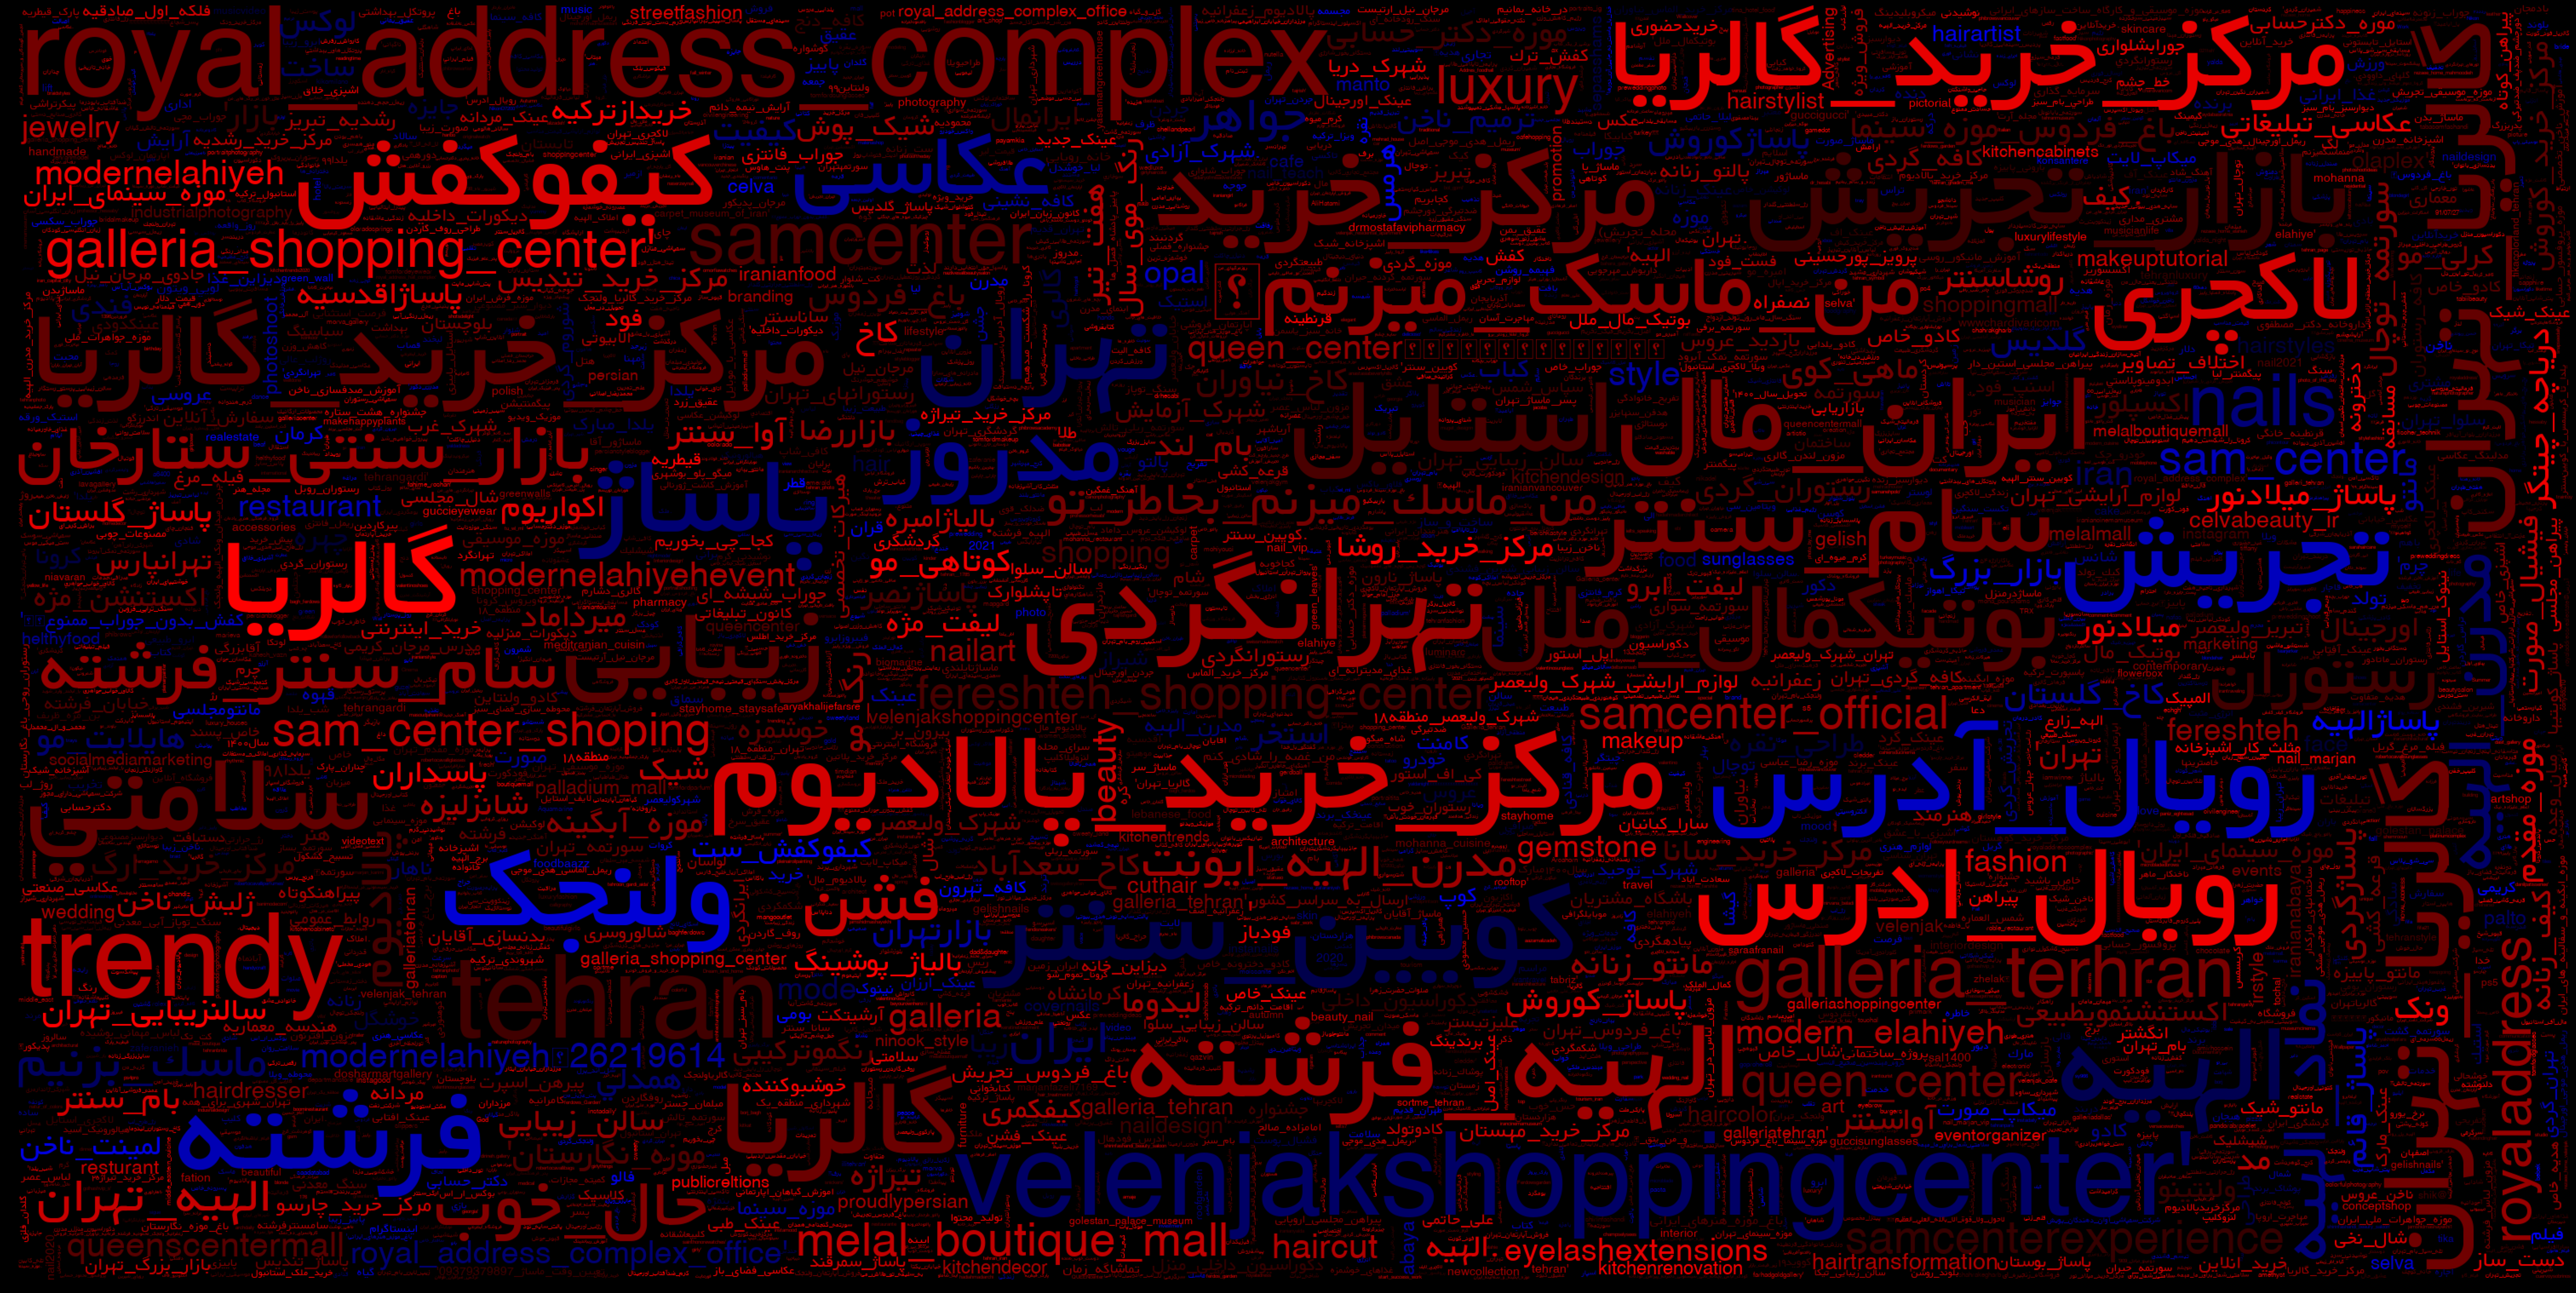

In [30]:
plt.figure( figsize=(100,100), facecolor='k' )
plt.imshow(word_cloud)
plt.margins(x=0, y=0)
plt.savefig("district{a}.pdf".format(a = district))

In [31]:
("district{a}.pdf".format(a = district))

'district0.pdf'